In [8]:
import seaborn as sns
import matplotlib.pyplot as pyplt
import pandas as pd
import seaborn as sns

In [3]:
sp500 = pd.read_csv("S&P 500 Post-Processing.csv")

# Some Data Understanding

In [11]:
sp500

,Symbol,Name,Sector,Price/Earnings,Earnings/Share,profitMargin,debtToEquityRatio,returnOnAssets,quickRatio
0,MMM,3M Company,Industrials,24.31,7.92,-0.214039,9.509465,-0.144175,0.701837
1,AOS,A.O. Smith Corp,Industrials,27.76,1.70,0.144466,0.742518,0.170053,1.014916
2,ABT,Abbott Laboratories,Health Care,22.51,0.26,0.142686,0.890786,0.077520,1.000217
3,ABBV,AbbVie Inc.,Health Care,19.41,3.29,0.089528,11.999421,0.035559,0.633466
4,ACN,Accenture plc,Information Technology,25.47,5.44,0.107181,0.964732,0.139512,1.096134
...,...,...,...,...,...,...,...,...,...
374,XRX,Xerox Corp.,Information Technology,8.87,0.59,0.000145,2.629360,0.000093,0.467794
375,XYL,Xylem Inc.,Industrials,30.94,1.83,0.082700,0.583907,0.050615,1.195465
376,YUM,Yum! Brands Inc,Consumer Discretionary,27.25,4.07,0.225692,-1.792950,0.264470,0.978074
377,ZBH,Zimmer Biomet Holdings,Health Care,14.32,9.01,0.138487,0.721830,0.048117,0.650311


In [4]:
sp500.describe()

,Price/Earnings,Earnings/Share,profitMargin,debtToEquityRatio,returnOnAssets,quickRatio
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,25.585805,3.815858,0.119022,2.493576,0.072116,0.955769
std,44.421724,5.078349,0.148888,12.391308,0.076473,1.001040
min,-251.530000,-19.940000,-0.888772,-60.056635,-0.188081,0.003442
25%,15.915000,1.530000,0.055714,0.839101,0.029131,0.404032
50%,20.180000,2.890000,0.113247,1.575441,0.059839,0.736892
75%,25.940000,5.120000,0.183070,2.926054,0.110069,1.084663
max,520.150000,44.090000,0.871678,123.791240,0.556730,11.712097


In [5]:
sp500.isna().sum()

Symbol               0
Name                 0
Sector               0
Price/Earnings       0
Earnings/Share       0
profitMargin         0
debtToEquityRatio    0
returnOnAssets       0
quickRatio           0
dtype: int64

In [7]:
sp500.duplicated().sum()

0

Creating a heatmap to see any correlation we can find of rip

<AxesSubplot:>

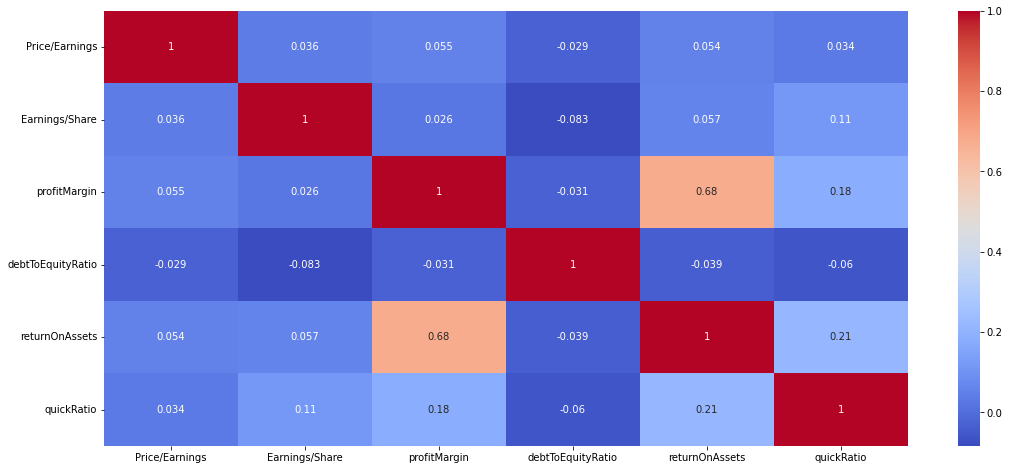

In [10]:
corr = sp500.corr()
pyplt.figure(figsize = (18,8))
sns.heatmap(corr, annot = True, cmap='coolwarm')

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
dataForCosineSimilarites = sp500.drop(columns=["Symbol", "Name", "Sector"])

In [34]:
cos_sim = cosine_similarity(dataForCosineSimilarites, dataForCosineSimilarites)
cos_sim

array([[1.        , 0.91611161, 0.90736226, ..., 0.89951487, 0.92278336,
        0.92246424],
       [0.91611161, 1.        , 0.99865505, ..., 0.99201968, 0.87756625,
        0.99934014],
       [0.90736226, 0.99865505, 1.        , ..., 0.98520259, 0.85298221,
        0.99906275],
       ...,
       [0.89951487, 0.99201968, 0.98520259, ..., 1.        , 0.91035662,
        0.98768767],
       [0.92278336, 0.87756625, 0.85298221, ..., 0.91035662, 1.        ,
        0.87248004],
       [0.92246424, 0.99934014, 0.99906275, ..., 0.98768767, 0.87248004,
        1.        ]])

In the follow section I will implement the function from the professor the sort through the cosine similarites

In [40]:
results = {}

for idx, row in sp500.iterrows():
    # print(cos_sim[idx].argsort()[:-100:-1])
    #This line of code is using .argsort() to get all the indecies of the similar stocks with the cosinesimlarities in acending order then we take the top 100 in descending order
    similar_indices = cos_sim[idx].argsort()[:-100:-1] 
    
    # print(df_genres['anime_id'].iloc[[0]].tolist())
    # print(df_genres['anime_id'].iloc[[5803]]) # I was using this to figure out what each individual piece of this chain is doing
    similar_items = [(cos_sim[idx][i], sp500['Symbol'].iloc[[i]].tolist()[0]) #Okay so I realized for the second element we use this chain ".iloc[[i]].tolist()[0]" to just pull only an int insted of a dataframe or list
                     for i in similar_indices]     
    
    # print(cos_sim[idx]) # I guess the point of this is to get the current company, then get the cosine similarity for the enxt closes company which is I from the similar_indices

    results[row['Symbol']] = similar_items[1:]
    
    

In [45]:
def get_CompName(symbol):
    return sp500[sp500["Symbol"] == symbol]["Name"].tolist()[0].split(' - ')[0] 
    

'Microsoft Corp.'

# Time to make reccomendations!!! :)

In [87]:
def recommend_Stock(ticker: str, num_Recommendations:int):
    print(f"Reccomendation for companies similar to {get_CompName(ticker)}")
    print("-----------")
    
    recs = results[ticker][:num_Recommendations]
    recsSymbols = [rec[1] for rec in recs]
    recsSymbols.append(ticker)
   
    for rec in recs:
        print(f"\tRecommended with a score {rec[0]}:\t{get_CompName(rec[1])}\n{sp500[sp500['Symbol'] == rec[1]]} \n")


    return sp500[sp500["Symbol"].isin(recsSymbols)]    
       
        
        
    

In [88]:
recommend_Stock(ticker="MSFT", num_Recommendations=5)

Reccomendation for companies similar to Microsoft Corp.
-----------
	Recommended with a score 0.9999255509653278:	Robert Half International
    Symbol                       Name       Sector  Price/Earnings  \
297    RHI  Robert Half International  Industrials           20.18   

     Earnings/Share  profitMargin  debtToEquityRatio  returnOnAssets  \
297            2.32      0.064317           0.895544        0.137616   

     quickRatio  
297    1.289448   

	Recommended with a score 0.9997236386170899:	Fortive Corp
    Symbol          Name       Sector  Price/Earnings  Earnings/Share  \
144    FTV  Fortive Corp  Industrials           25.05            2.46   

     profitMargin  debtToEquityRatio  returnOnAssets  quickRatio  
144      0.142746           0.638295        0.052789      1.5908   

	Recommended with a score 0.9996937923957704:	Analog Devices, Inc.
   Symbol                  Name                  Sector  Price/Earnings  \
32    ADI  Analog Devices, Inc.  Information Technol

,Symbol,Name,Sector,Price/Earnings,Earnings/Share,profitMargin,debtToEquityRatio,returnOnAssets,quickRatio
32,ADI,"Analog Devices, Inc.",Information Technology,17.67,2.11,0.269357,0.371976,0.066896,0.758456
130,EXPD,Expeditors International,Industrials,25.26,2.36,0.080954,0.892085,0.148876,1.786823
144,FTV,Fortive Corp,Industrials,25.05,2.46,0.142746,0.638295,0.052789,1.590800
233,MSFT,Microsoft Corp.,Information Technology,25.76,2.97,0.341462,0.997721,0.186302,1.535723
297,RHI,Robert Half International,Industrials,20.18,2.32,0.064317,0.895544,0.137616,1.289448
320,SYK,Stryker Corp.,Health Care,23.46,2.68,0.154405,1.146614,0.082426,0.860750
